In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [7]:
def initialisation(dimensions):

    C = len(dimensions) 
    
    parametres = {}
    for c in range(1, C):
        parametres['W' +str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)
        
    return parametres

In [8]:
# test de l'initialisation
param = initialisation([2, 32, 32,1])

for key, val in param.items():
    print(key, val.shape)


W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


In [9]:
def forward_propagation(X, parametres):

    C = len(parametres) // 2 #comme W et b présent, alors on divise par 2
    activations = {'A0' : X}
    
    for c in range(1, C +1): 
        Z = parametres['W'+str(c)].dot(activations['A' +str(c-1)]) + parametres['b'+str(c)]
        activations['A' +str(c)] =   1 / (1 +np.exp(-Z))

        
    return activations

In [10]:
#test de la forward propoagation
params = initialisation([2, 32, 32,1])
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
activations = forward_propagation(X, param)
for key, val in activations.items():
    print(key, val.shape)


A0 (2, 1000)
A1 (32, 1000)
A2 (32, 1000)
A3 (1, 1000)


In [11]:
def back_propagation(y, parametres, activations):

    
    m = y.shape[1]
    C = len(parametres) // 2 
    
    dZ = activations['A' + str(C)] - y
    gradients = {}

    
    
    
    
    for c in reversed(range(1, C+1)):
        gradients['dW'+ str(c)] = 1/m * np.dot(dZ, activations['A' + str(c -1)].T)
        gradients['db'+ str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W'+ str(c)].T, dZ) * activations['A' + str(c -1)] * (1 - activations['A' + str(c -1)])

    
    return gradients

In [12]:
grad = back_propagation(y, params, activations)

for key, val in grad.items():
    print(key, val.shape)


dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


In [13]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)]  - learning_rate * gradients['dW' + str(c)] 
        parametres['b' + str(c)] = parametres['b' + str(c)]  - learning_rate * gradients['db' + str(c)] 
        

    return parametres

In [44]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [45]:
def  neural_network(X, y, hidden_layers = [32,32,32], learning_rate = 0.1, n_iter = 100):


    np.random.seed(0)
     # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        
        if i %10 == 0: 
            C = len(parametres) // 2
            train_loss.append(log_loss(y, activations['A' + str(C)]))
            y_pred = predict(X, parametres)
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4)) 
    ax[0].plot(train_loss, label= 'train loss')
    ax[0].legend()

    ax[1].plot(train_acc, label='train acc')
    ax[1].legend()
    plt.show()



# Dataset
fictif

(1, 1000)


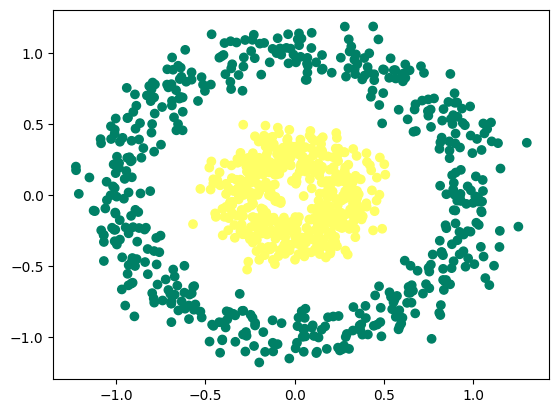

In [51]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
print(y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
  1%|          | 9/1000 [00:00<00:20, 47.36it/s]C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
  2%|▏         | 21/1000 [00:00<00:12, 75.93it/s]C:\Users\yassi\AppData\

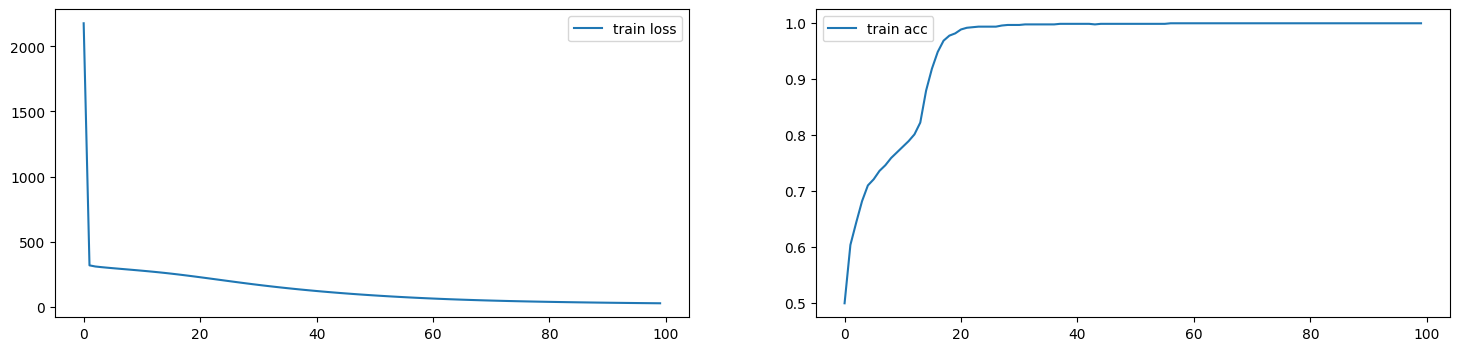

In [47]:
neural_network(X, y, n_iter=1000)

Test Cat vs Dog
je vais essayer d'entrainer le réseau de neurone dév ci dessus avec un DataSet de chat et de chien. Après avoir visualiser les premiers résultats, j'essaierai d'ajuster les params (et aussi le nombres de neurones et de couches pour le fun) afin d'avoir le meilleur résultat possible. 

In [48]:
%pip install h5py
import numpy as np
import matplotlib.pyplot as plt

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\yassi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [34]:
from utilities import *
X_train, y_train, X_test, y_test = load_data()

In [35]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1000, 64, 64)
X_test shape: (200, 64, 64)
y_train shape: (1000, 1)
y_test shape: (200, 1)


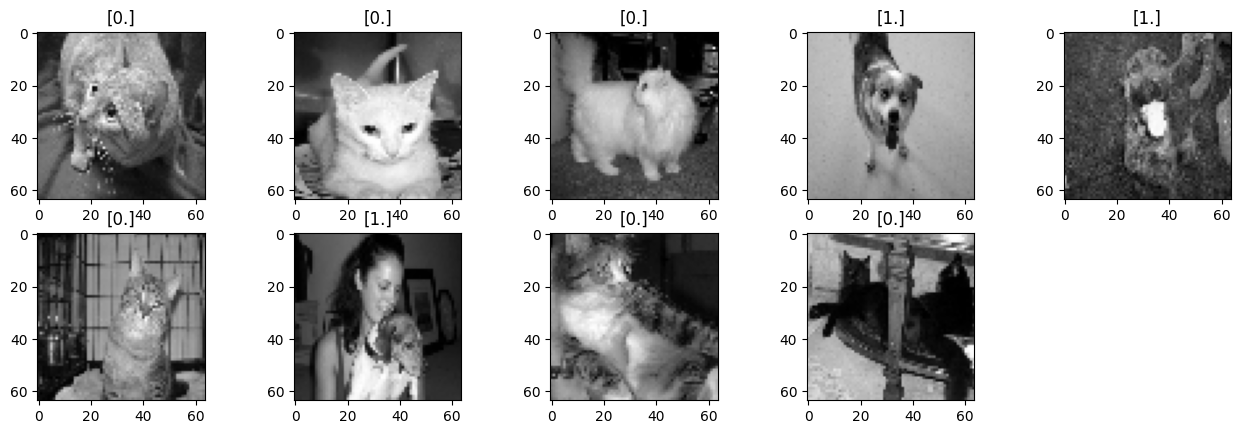

In [58]:
#matplotlib pour afficher les images du datasets
plt.figure(figsize=(16,10))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout

In [ ]:
#Normalisation des datas 
#on normalise que les images
X_train_normalized = X_train / X_train.max()
X_test_normalized = X_test / X_train.max()

# Vérification des valeurs
print(f"X_train_normalized: min = {X_train_normalized.min()}, max = {X_train_normalized.max()}")
print(f"X_test_normalized: min = {X_test_normalized.min()}, max = {X_test_normalized.max()}")

X_train_normalized: min = 0, max = 254
X_train_normalized: min = 0.0, max = 1.0
X_test_normalized: min = 0.0, max = 1.0


In [56]:
#flattening des datas
X_train_flatten = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flatten = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Vérification des nouvelles dimensions
print(f"X_train_flatten shape: {X_train_flatten.shape}")
print(f"X_test_flatten shape: {X_test_flatten.shape}")

X_train_flatten shape: (1000, 4096)
X_test_flatten shape: (200, 4096)


In [57]:
neural_network(X_train_flatten, y_train, n_iter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
  0%|          | 0/1000 [00:00<?, ?it/s]


ValueError: y_true and y_pred contain different number of classes 2, 4096. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0. 1.]